## Customer Churn Analysis and Prediction

__Imports__

In [1]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import (
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.preprocessing import (
    OneHotEncoder,
    LabelEncoder,
    PolynomialFeatures,
    StandardScaler,
    FunctionTransformer
)

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline


from sklearn.linear_model import (
    Lasso, 
    Ridge,
    LogisticRegression
)

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

 

In [2]:
data = pd.read_csv("data/raw/customer_churn.csv")

In [3]:
train_df, test_df = train_test_split(data, test_size=0.2, random_state=123)

In [4]:
train_df

,Unnamed: 0,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
1881,1881,76,0,272.7,236.4,235.5,7.7,0,yes,no,...,46.36,95,20.09,105,10.60,2,2.08,NE,415,334-6519
48,48,119,0,159.1,231.3,143.2,8.8,5,yes,no,...,27.05,117,19.66,91,6.44,3,2.38,ID,415,398-1294
2886,2886,85,0,144.4,264.6,185.4,9.9,1,no,no,...,24.55,105,22.49,94,8.34,3,2.67,PA,408,405-9573
2294,2294,59,0,189.7,115.9,220.6,7.4,0,no,no,...,32.25,133,9.85,115,9.93,4,2.00,WV,510,362-9391
314,314,128,0,125.2,205.4,254.4,18.9,0,no,no,...,21.28,107,17.46,111,11.45,2,5.10,ID,408,359-5890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,2154,126,0,197.6,246.5,285.3,12.5,2,no,yes,...,33.59,112,20.95,104,12.84,8,3.38,WY,408,339-9798
3089,3089,70,30,143.4,170.0,127.9,9.4,3,no,no,...,24.38,92,14.45,68,5.76,4,2.54,WV,510,348-3777
1766,1766,125,0,182.3,139.8,171.6,11.6,2,no,no,...,30.99,121,11.88,96,7.72,7,3.13,NJ,415,406-6400
1122,1122,159,0,189.1,246.1,242.0,10.4,1,yes,no,...,32.15,147,20.92,106,10.89,5,2.81,NE,415,362-5111


<AxesSubplot:>

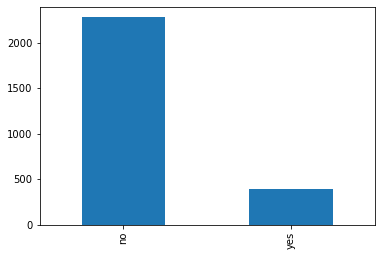

In [5]:
train_df["Churn"].value_counts().plot.bar()

There is class imbalance

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2666 entries, 1881 to 1346
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2666 non-null   int64  
 1   Account_Length  2666 non-null   int64  
 2   Vmail_Message   2666 non-null   int64  
 3   Day_Mins        2666 non-null   float64
 4   Eve_Mins        2666 non-null   float64
 5   Night_Mins      2666 non-null   float64
 6   Intl_Mins       2666 non-null   float64
 7   CustServ_Calls  2666 non-null   int64  
 8   Churn           2666 non-null   object 
 9   Intl_Plan       2666 non-null   object 
 10  Vmail_Plan      2666 non-null   object 
 11  Day_Calls       2666 non-null   int64  
 12  Day_Charge      2666 non-null   float64
 13  Eve_Calls       2666 non-null   int64  
 14  Eve_Charge      2666 non-null   float64
 15  Night_Calls     2666 non-null   int64  
 16  Night_Charge    2666 non-null   float64
 17  Intl_Calls      2666 non-null 

- NO NULL Values 

In [7]:
train_df.describe().columns

Index(['Unnamed: 0', 'Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins',
       'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Day_Calls', 'Day_Charge',
       'Eve_Calls', 'Eve_Charge', 'Night_Calls', 'Night_Charge', 'Intl_Calls',
       'Intl_Charge', 'Area_Code'],
      dtype='object')

In [8]:
train_df.columns

Index(['Unnamed: 0', 'Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins',
       'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan',
       'Vmail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge',
       'Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State',
       'Area_Code', 'Phone'],
      dtype='object')

In [9]:
numerical_features_to_analyze = ['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins',
       'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Day_Calls', 'Day_Charge',
       'Eve_Calls', 'Eve_Charge', 'Night_Calls', 'Night_Charge', 'Intl_Calls',
       'Intl_Charge']

target = ["Churn"]

categorical_features_to_analyze = ['Intl_Plan', 'State', 'Vmail_Plan']


In [10]:
# for col in numerical_features_to_analyze:
#     sns.distplot(data[col])
#     plt.show()
# charts = []
# for col in numerical_features_to_analyze:
#     charts.append(alt.Chart(data).mark_bar().encode(
#         alt.X(col, bin=alt.Bin(maxbins=100)),
#         alt.Y("count()"),
#         color="Churn"
#     ))
# alt.hconcat(*charts)

alt.Chart(train_df).mark_bar(opacity=0.7).encode(
    alt.X(alt.repeat(), type='quantitative', bin=alt.Bin(maxbins=50)),
    alt.Y('count()'),
    color='Churn'
).properties(
    width=200,
    height=200
).repeat(numerical_features_to_analyze, columns=3, title='Distribution of Numerical Features'
)

alt.RepeatChart(...)

### Categorical features

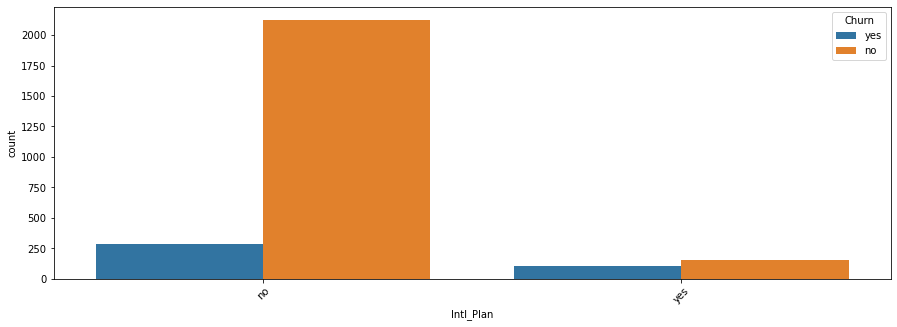

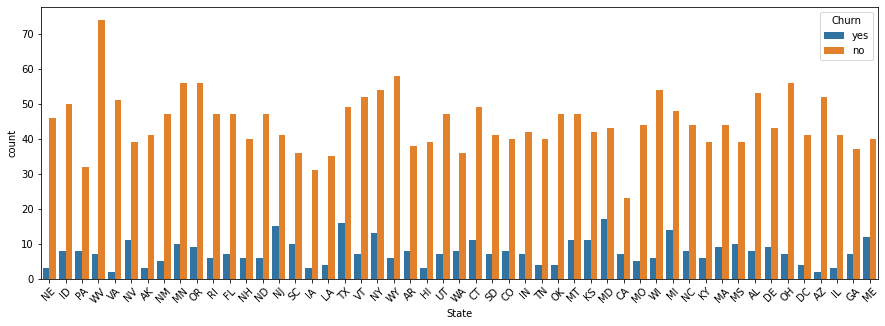

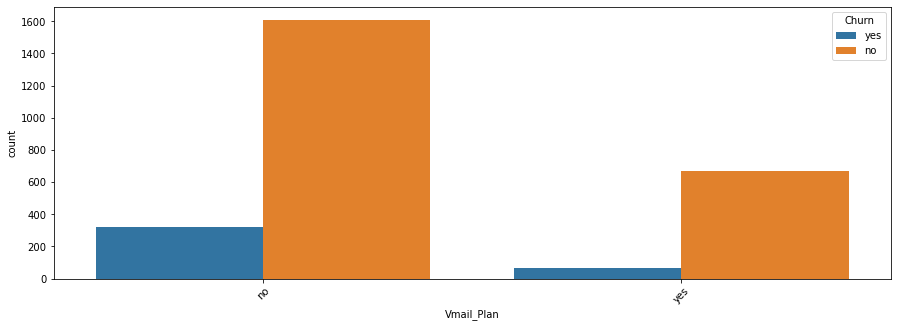

In [11]:
# alt.Chart(data).mark_boxplot().encode(
#     alt.X("Churn"),
#     alt.Y(alt.repeat(), type='quantitative')
# ).properties(
#     width=200,
#     height=200
# ).repeat(categorical_features_to_analyze, title='Distribution of Categorical Features')

for col in categorical_features_to_analyze:
    plt.figure(figsize=(15,5))
    sns.countplot(x=col, data=train_df, hue='Churn')
    plt.xticks(rotation=45)
    plt.show()
    

In [12]:
corr_df = train_df.drop(["Area_Code", "Unnamed: 0", "Phone"], axis=1).corr("spearman").abs().stack().reset_index(name='corr')
corr_df.to_csv("temp.csv")

In [13]:
corr_matrix = alt.Chart(corr_df).mark_rect().encode(
    x='level_0',
    y='level_1',
    color='corr'
) 
        

corr_matrix

alt.Chart(...)

### Feature Engineering/Feature Selection

The features are correlated, hence one of them can be removed.

In [14]:
train_df["Churn"].replace({"yes": 0, "no": 1}, inplace=True)

In [15]:
train_df_small, val_df = train_test_split(train_df, test_size=0.2, random_state=123)
X_train, y_train = train_df_small.drop(columns=["Churn"]), train_df_small["Churn"]
X_val, y_val = val_df.drop(columns=["Churn"]), val_df["Churn"] 

In [16]:
def total_min(data):
    data["Total_Mins"] = data["Night_Mins"] + data["Intl_Mins"] + data["Day_Mins"] + data["Eve_Mins"]
    return data

In [17]:
def cost(data, col):
    data[f"{col}_cost"] = data[f"{col}_Mins"]/data[f"{col}_Charge"]
    return data
                                                   

In [18]:
def avg_time(data, col):
    data[f"{col}_avg_time"] = data[f"{col}_Mins"]/data[f"{col}_Calls"]
    return data
    

In [19]:
X_train = total_min(X_train)
X_val = total_min(X_val)

In [20]:
X_train = cost(X_train, "Day")
X_train = cost(X_train, "Eve")
X_train = cost(X_train, "Intl")
X_train = cost(X_train, "Night")


X_val = cost(X_val, "Day")
X_val = cost(X_val, "Eve")
X_val = cost(X_val, "Intl")
X_val = cost(X_val, "Night")

In [21]:
X_train = avg_time(X_train, "Day")
X_train = avg_time(X_train, "Eve")
X_train = avg_time(X_train, "Intl")
X_train = avg_time(X_train, "Night")


X_val = avg_time(X_val, "Day")
X_val = avg_time(X_val, "Eve")
X_val = avg_time(X_val, "Intl")
X_val = avg_time(X_val, "Night")

In [22]:
X_train.to_csv("temp.csv")

### Column Transformer

In [23]:
numerical_features = [
    "Account_Length", 
    'Vmail_Message', 
    'Day_Mins', 
    'Eve_Mins',
    'Night_Mins', 
    'Intl_Mins', 
    'CustServ_Calls',
    'Day_Calls',
    'Eve_Calls',  
    'Night_Calls',
    'Intl_Calls',
    'Total_Mins', 
    'Day_cost', 
    'Eve_cost', 
    'Intl_cost',
    'Night_cost', 
    'Day_avg_time', 
    'Eve_avg_time', 
    'Intl_avg_time',
    'Night_avg_time'
    
]

categorical_features = [
    'Intl_Plan', 
    'Vmail_Plan',
    'State'   
]

drop_features = [
    'Unnamed: 0', 
     'Day_Charge', 
     'Eve_Charge', 
     'Night_Charge', 
     'Intl_Charge', 
     'Area_Code', 
     'Phone',
]

pass_through = [ ]

In [24]:
assert len(numerical_features) + len(categorical_features) + len(drop_features) == len(X_train.columns)

In [25]:
# define Pipeline

pipeline_numerical = make_pipeline(SimpleImputer(strategy="mean"), StandardScaler())

preprocessor = make_column_transformer(
    (pipeline_numerical, numerical_features), 
    (OneHotEncoder(handle_unknown="ignore", sparse=False, drop="if_binary"), categorical_features)
)

In [26]:
transformed_df = preprocessor.fit_transform(X_train, y_train)

In [27]:
preprocessor

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Account_Length', 'Vmail_Message', 'Day_Mins',
                                  'Eve_Mins', 'Night_Mins', 'Intl_Mins',
                                  'CustServ_Calls', 'Day_Calls', 'Eve_Calls',
                                  'Night_Calls', 'Intl_Calls', 'Total_Mins',
                                  'Day_cost', 'Eve_cost', 'Intl_cost',
                                  'Night_cost', 'Day_avg_time', 'Eve_avg_time',
                                  'Intl_avg_time', 'Night_avg_time']),
                                ('onehotencoder',
                                 OneHotEncoder(drop='if_binary',
                                   

In [28]:
new_columns = numerical_features + preprocessor.named_transformers_["onehotencoder"].get_feature_names_out().tolist()

In [29]:
def cross_val_score(model, X_train, y_train, X_val, y_val, return_train_score=True):
    start_time_fit = time.time()
    model.fit(X_train, y_train)
    end_time_fit = time.time()
    start_time_score = time.time()
    y_val_pred = model.predict(X_val)
    
    
    scores_dict = {
        "roc_auc_test":roc_auc_score(y_val, y_val_pred, average="weighted"),
        "f1_test":f1_score(y_val, y_val_pred, average="weighted"),
        "recall_test":recall_score(y_val, y_val_pred, average="weighted"),
        "precision_test": precision_score(y_val, y_val_pred, average="weighted")
    }
    end_time_score = time.time()
    scores_dict["score_time"] = end_time_score - start_time_score
    
    if return_train_score:
        y_train_pred = model.predict(X_train)
        scores_dict["roc_auc_train"] = roc_auc_score(y_train, y_train_pred, average="weighted"),
        scores_dict["f1_train"] = f1_score(y_train, y_train_pred, average="weighted"),
        scores_dict["recall_train"] = recall_score(y_train, y_train_pred, average="weighted"),
        scores_dict["precision_test"] = precision_score(y_train, y_train_pred, average="weighted")
        scores_dict["fit_time"] = end_time_fit - start_time_fit
        
    
    scores_results = pd.Series(scores_dict)
    
    return model, scores_results


### Modelling

#### Base Models

In [31]:
pipe_lr = make_pipeline(preprocessor, LogisticRegression(max_iter=100000))
pipe_dt = make_pipeline(preprocessor, DecisionTreeClassifier())
pipe_nb = make_pipeline(preprocessor, GaussianNB())
pipe_svc = make_pipeline(preprocessor, SVC())
pipe_rf = make_pipeline(preprocessor, RandomForestClassifier())
pipe_catboost = make_pipeline(preprocessor, CatBoostClassifier(verbose=False))
pipe_lgbm = make_pipeline(preprocessor, LGBMClassifier())

In [32]:
models_dict = {
    "Logistic": pipe_lr,
    "Decision_Tree": pipe_dt,
    "Naive Bayes": pipe_nb,
    "SVC": pipe_svc,
    "Random Forest": pipe_rf,
    "catboost": pipe_catboost,
    "lgbm": pipe_lgbm
}


In [33]:
results = {}
for name, model in models_dict.items():
    print(f"Starting Model: {name}")
    _, results[name] = cross_val_score(
        model,
        X_train,
        y_train, 
        X_val, 
        y_val, 
        return_train_score=True
    )
    print(f"Finish Model: {name}")


Starting Model: Logistic
Finish Model: Logistic
Starting Model: Decision_Tree
Finish Model: Decision_Tree
Starting Model: Naive Bayes
Finish Model: Naive Bayes
Starting Model: SVC
Finish Model: SVC
Starting Model: Random Forest
Finish Model: Random Forest
Starting Model: catboost
Finish Model: catboost
Starting Model: lgbm
Finish Model: lgbm


In [34]:
pd.DataFrame(results)

,Logistic,Decision_Tree,Naive Bayes,SVC,Random Forest,catboost,lgbm
roc_auc_test,0.582459,0.821775,0.549437,0.688326,0.840909,0.885295,0.886364
f1_test,0.849404,0.917042,0.62832,0.905862,0.957386,0.968481,0.970331
recall_test,0.872659,0.91573,0.552434,0.921348,0.960674,0.970037,0.97191
precision_test,0.847944,1.0,0.823493,0.941912,1.0,0.985251,1.0
score_time,0.006322,0.005795,0.006677,0.067277,0.01352,0.01533,0.00744
roc_auc_train,"(0.6274921931299544,)","(1.0,)","(0.6646975052331766,)","(0.7991369548059435,)","(1.0,)","(0.9503105590062112,)","(1.0,)"
f1_train,"(0.8455745732783082,)","(1.0,)","(0.6694891513644644,)","(0.9320497658198436,)","(1.0,)","(0.9846639755370804,)","(1.0,)"
recall_train,"(0.8681988742964353,)","(1.0,)","(0.6149155722326454,)","(0.9385553470919324,)","(1.0,)","(0.9849906191369606,)","(1.0,)"
fit_time,0.05707,0.038536,0.008451,0.113693,0.302738,1.640686,0.176935


### HyperParam Tune SVC, Random Forest and LGBM

In [35]:
#SVC
param_grid = {"svc__C": 10.0 ** np.arange(-1, 3),
             "svc__gamma": 10.0 ** np.arange(-1, 2),
             "svc__kernel": ["linear", "rbf", "poly"],
             "svc__class_weight":['balanced', None]
             }


In [36]:
results_svc = {}
pipe_svc_hp = make_pipeline(preprocessor, SVC())
grid_search = GridSearchCV(pipe_svc_hp, param_grid, cv=10, n_jobs=-1, return_train_score=True, scoring="roc_auc")
results_svc = grid_search.fit(X_train, y_train)

In [41]:
pd.DataFrame(results_svc.cv_results_)[["mean_fit_time", 
                                      "mean_score_time",
                                      "param_svc__C",
                                      "param_svc__gamma",
                                      "param_svc__kernel",
                                      "param_svc__class_weight",
                                      "mean_test_score",
                                      "mean_train_score"]].sort_values(by="mean_test_score", ascending=False)

,mean_fit_time,mean_score_time,param_svc__C,param_svc__gamma,param_svc__kernel,param_svc__class_weight,mean_test_score,mean_train_score
28,0.188524,0.062164,1.0,0.1,rbf,None,0.880408,0.991661
19,0.220813,0.072677,1.0,0.1,rbf,balanced,0.873583,0.999763
64,0.268221,0.060242,100.0,0.1,rbf,None,0.872988,1.000000
37,0.278433,0.058179,10.0,0.1,rbf,balanced,0.872988,1.000000
46,0.308681,0.062721,10.0,0.1,rbf,None,0.872988,1.000000
...,...,...,...,...,...,...,...,...
34,0.353381,0.103682,1.0,10.0,rbf,None,0.498161,1.000000
16,0.371774,0.106577,0.1,10.0,rbf,None,0.498161,1.000000
43,0.423202,0.112483,10.0,10.0,rbf,balanced,0.498161,1.000000
70,0.375390,0.110394,100.0,10.0,rbf,None,0.498161,1.000000


In [42]:
results_svc.best_params_

{'svc__C': 1.0,
 'svc__class_weight': None,
 'svc__gamma': 0.1,
 'svc__kernel': 'rbf'}

In [43]:
results_svc.best_score_

0.880408191026285

In [44]:
#RF
param_grid_rf = {
    'randomforestclassifier__max_depth': np.linspace(1, 32, 32, endpoint=True),
    'randomforestclassifier__max_features': [2, 3],
    'randomforestclassifier__min_samples_leaf': [3, 4, 5],
    'randomforestclassifier__n_estimators':[1, 4, 10, 100, 1000],
    'randomforestclassifier__class_weight': ["balanced", None]
}

results_rf = {}

pipe_rf = make_pipeline(preprocessor, RandomForestClassifier())
grid_search = GridSearchCV(pipe_rf,
                           param_grid=param_grid_rf,
                           cv=5,
                           n_jobs=-1,
                           return_train_score=True,
                           scoring="roc_auc")
results_rf = grid_search.fit(X_train, y_train)


In [45]:
pd.DataFrame(results_rf.cv_results_)[["mean_fit_time", 
                                      "mean_score_time",
                                      "param_randomforestclassifier__max_depth",
                                      "param_randomforestclassifier__max_features",
                                      "param_randomforestclassifier__min_samples_leaf",
                                      "param_randomforestclassifier__n_estimators",
                                      "mean_test_score",
                                      "mean_train_score"]].sort_values(by="mean_test_score", ascending=False)

,mean_fit_time,mean_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__max_features,param_randomforestclassifier__min_samples_leaf,param_randomforestclassifier__n_estimators,mean_test_score,mean_train_score
1699,2.268824,0.121503,25.0,3,3,1000,0.903484,0.995122
1678,0.223526,0.017331,24.0,3,5,100,0.902594,0.979744
1519,2.220656,0.128254,19.0,3,3,1000,0.902509,0.993772
1429,2.165333,0.123567,16.0,3,3,1000,0.902014,0.991533
1909,2.269719,0.121987,32.0,3,3,1000,0.901935,0.995193
...,...,...,...,...,...,...,...,...
975,0.013115,0.003304,1.0,3,3,1,0.513477,0.519071
35,0.018456,0.005783,2.0,2,4,1,0.511929,0.528315
25,0.010867,0.006576,1.0,3,5,1,0.510413,0.523080
100,0.013541,0.003441,4.0,2,5,1,0.509825,0.561716


In [46]:
results_rf.best_params_

{'randomforestclassifier__class_weight': None,
 'randomforestclassifier__max_depth': 25.0,
 'randomforestclassifier__max_features': 3,
 'randomforestclassifier__min_samples_leaf': 3,
 'randomforestclassifier__n_estimators': 1000}

In [47]:
results_rf.best_score_

0.9034839832129198

In [48]:
#LGBM

param_grid_lgbm = {
    "lgbmclassifier__n_estimators": [10, 100, 1000],
    "lgbmclassifier__max_depth": [5, 10, 15],
    "lgbmclassifier__learning_rate": 10.0 ** np.arange(-2, 2),
    "lgbmclassifier__class_weight": ["balanced", None]
}

results_lgbm = {}
pipe_lgbm = make_pipeline(preprocessor, LGBMClassifier())
grid_search = GridSearchCV(pipe_lgbm,
                           param_grid=param_grid_lgbm,
                           cv=5,
                           n_jobs=-1,
                           return_train_score=True,
                           scoring="roc_auc"
                          )
results_lgbm = grid_search.fit(X_train, y_train)

In [51]:
pd.DataFrame(results_lgbm.cv_results_)[["mean_fit_time", 
                                      "mean_score_time",
                                      "param_lgbmclassifier__n_estimators",
                                      "param_lgbmclassifier__max_depth",
                                      "param_lgbmclassifier__learning_rate",
                                      "mean_test_score",
                                      "mean_train_score"]].sort_values(by="mean_test_score", ascending=False)

,mean_fit_time,mean_score_time,param_lgbmclassifier__n_estimators,param_lgbmclassifier__max_depth,param_lgbmclassifier__learning_rate,mean_test_score,mean_train_score
49,0.190189,0.013506,100,10,0.1,0.925731,1.000000
10,0.111002,0.011421,100,5,0.1,0.923680,0.999940
41,1.861110,0.093355,1000,10,0.01,0.922907,1.000000
2,0.836591,0.030214,1000,5,0.01,0.922558,0.999895
5,1.695733,0.128603,1000,10,0.01,0.921824,1.000000
...,...,...,...,...,...,...,...
70,0.045494,0.007578,100,15,10.0,0.560410,0.577553
71,0.127675,0.005419,1000,15,10.0,0.560410,0.577553
27,0.028268,0.007679,10,5,10.0,0.489690,0.466238
28,0.036986,0.007517,100,5,10.0,0.489690,0.466238


In [52]:
results_lgbm.best_score_

0.9257312473438164

In [53]:
results_lgbm.best_params_

{'lgbmclassifier__class_weight': None,
 'lgbmclassifier__learning_rate': 0.1,
 'lgbmclassifier__max_depth': 10,
 'lgbmclassifier__n_estimators': 100}

In [ ]:
# import sklearn
# sklearn.metrics.SCORERS.keys()

### Ensemble Models

In [56]:
pipe_svc_final =make_pipeline(
    preprocessor,
    SVC(
        C=1.0, 
        class_weight=None, 
        gamma= 0.1, 
        kernel='rbf'
    )
)

pipe_rf_final = make_pipeline(
    preprocessor,
    RandomForestClassifier(
        class_weight=None,
        max_depth=25.0, 
        max_features=3, 
        min_samples_leaf=3,
        n_estimators= 1000
    )
)

pipe_lgbm_final = make_pipeline(
    preprocessor,
    LGBMClassifier(
        class_weight=None,
        learning_rate=0.1,
        max_depth=10,
        n_estimators=100
    )
)

In [57]:
model_ens = {
    "svc": pipe_svc_final,
    "RF": pipe_rf_final,
    "lgbm": pipe_lgbm_final
}

In [ ]:
### Voting Model

